In [29]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
uploaded = files.upload()

Saving dados.xlsx to dados (1).xlsx


In [92]:
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name, engine='openpyxl')

In [93]:
print("Dados antes da limpeza:")
print(df.head())

Dados antes da limpeza:
                Tempo  Temperatura de Entrada do Multijato  \
0 2016-08-15 00:00:00                            38.594730   
1 2016-08-15 00:10:00                            38.605957   
2 2016-08-15 00:20:00                            38.649410   
3 2016-08-15 00:30:00                            38.508724   
4 2016-08-15 00:40:00                            38.411461   

   Temperatura de saída no multijato Abertura da válvula de alimentação  \
0                          49.506126                                Bad   
1                          50.266792                                Bad   
2                          49.517982                                Bad   
3                          49.323696                                Bad   
4                          49.471863                                Bad   

   Nível do cozedor Capacitância do cozedor  Pressão do cozedor  \
0          2.418745                     Bad            0.154811   
1          2.45336

In [94]:
def contar_bad(df):
    total_bad_celulas = df.apply(lambda col: col.map(lambda x: isinstance(x, str) and 'bad' in x.strip().lower())).sum().sum()
    total_bad_colunas = df.apply(lambda col: col.map(lambda x: isinstance(x, str) and 'bad' in x.strip().lower())).any().sum()
    total_bad_linhas = df.apply(lambda col: col.map(lambda x: isinstance(x, str) and 'bad' in x.strip().lower())).any(axis=1).sum()

    return total_bad_linhas, total_bad_colunas, total_bad_celulas

total_bad_linhas, total_bad_colunas, total_bad_celulas = contar_bad(df)

print(f"Total de linhas contendo 'Bad': {total_bad_linhas}")
print(f"Total de colunas contendo 'Bad': {total_bad_colunas}")
print(f"Total de células contendo 'Bad': {total_bad_celulas}")

Total de linhas contendo 'Bad': 1285
Total de colunas contendo 'Bad': 16
Total de células contendo 'Bad': 5297


In [95]:
df = df.map(lambda x: 0.0 if isinstance(x, str) and "bad" in x.strip().lower() else x)

In [96]:
print(df.head())

                Tempo  Temperatura de Entrada do Multijato  \
0 2016-08-15 00:00:00                            38.594730   
1 2016-08-15 00:10:00                            38.605957   
2 2016-08-15 00:20:00                            38.649410   
3 2016-08-15 00:30:00                            38.508724   
4 2016-08-15 00:40:00                            38.411461   

   Temperatura de saída no multijato  Abertura da válvula de alimentação  \
0                          49.506126                                 0.0   
1                          50.266792                                 0.0   
2                          49.517982                                 0.0   
3                          49.323696                                 0.0   
4                          49.471863                                 0.0   

   Nível do cozedor  Capacitância do cozedor  Pressão do cozedor  \
0          2.418745                      0.0            0.154811   
1          2.453368               

In [97]:
print("Dados após a limpeza:")
print(df.head())

Dados após a limpeza:
                Tempo  Temperatura de Entrada do Multijato  \
0 2016-08-15 00:00:00                            38.594730   
1 2016-08-15 00:10:00                            38.605957   
2 2016-08-15 00:20:00                            38.649410   
3 2016-08-15 00:30:00                            38.508724   
4 2016-08-15 00:40:00                            38.411461   

   Temperatura de saída no multijato  Abertura da válvula de alimentação  \
0                          49.506126                                 0.0   
1                          50.266792                                 0.0   
2                          49.517982                                 0.0   
3                          49.323696                                 0.0   
4                          49.471863                                 0.0   

   Nível do cozedor  Capacitância do cozedor  Pressão do cozedor  \
0          2.418745                      0.0            0.154811   
1          2

In [98]:
df[df.columns[0]] = pd.to_datetime(df[df.columns[0]], errors='coerce')

In [99]:
print(df.head())

                Tempo  Temperatura de Entrada do Multijato  \
0 2016-08-15 00:00:00                            38.594730   
1 2016-08-15 00:10:00                            38.605957   
2 2016-08-15 00:20:00                            38.649410   
3 2016-08-15 00:30:00                            38.508724   
4 2016-08-15 00:40:00                            38.411461   

   Temperatura de saída no multijato  Abertura da válvula de alimentação  \
0                          49.506126                                 0.0   
1                          50.266792                                 0.0   
2                          49.517982                                 0.0   
3                          49.323696                                 0.0   
4                          49.471863                                 0.0   

   Nível do cozedor  Capacitância do cozedor  Pressão do cozedor  \
0          2.418745                      0.0            0.154811   
1          2.453368               

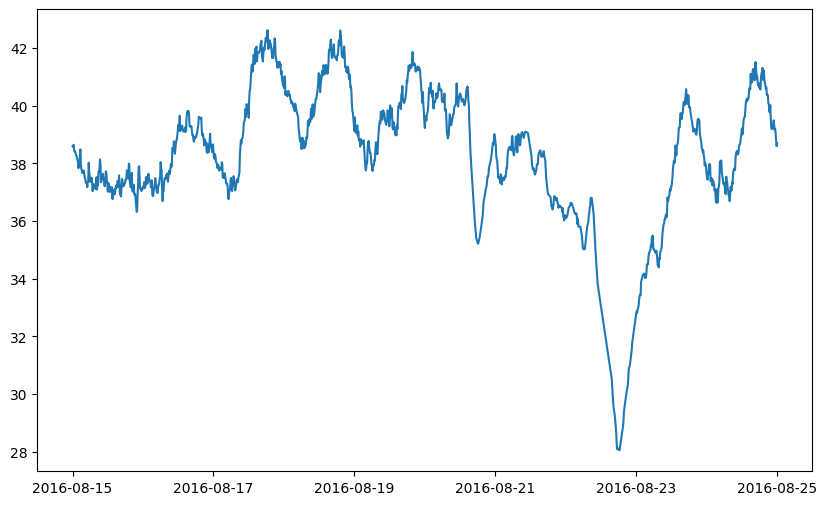

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(df[df.columns[0]], df[df.columns[1]], label='Temperatura de Entrada do Multijato')

In [101]:
df.to_excel('planilha_limpa.xlsx', index=False, engine='openpyxl')

In [102]:
files.download('planilha_limpa.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>